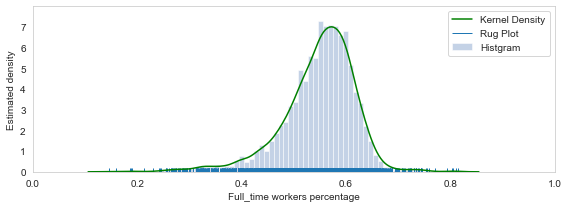

0.5484258616971315 0.55826859 0.5726212813823142 0.004967582875405277 0.07048108168441569 -1.0556209970210544 2.8093917500623657


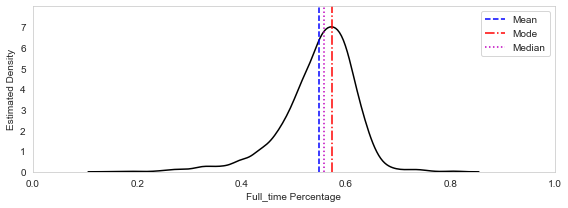

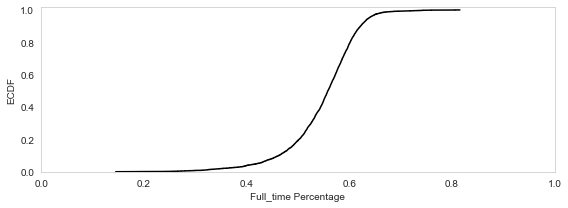



0.514603616 0.55826859 0.594091904 0.6383381008 0.68488018732




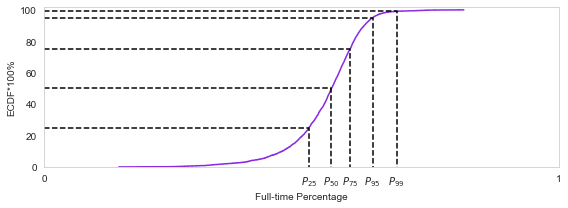

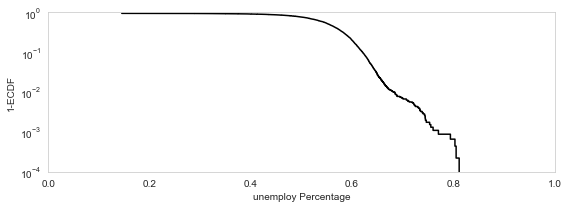

0.07948828799999996
         ID        PT        FT        SF        UN
0     23905  0.220570  0.560099  0.110285  0.070632
1     23906  0.183651  0.596865  0.116461  0.052632
2     23907  0.211173  0.563128  0.165363  0.021229
3     23908  0.165318  0.632370  0.132948  0.027746
4     23909  0.223022  0.528058  0.178417  0.028777
...     ...       ...       ...       ...       ...
4492  52102  0.246411  0.416268  0.083732  0.209330
4493  52103  0.190554  0.522801  0.114007  0.120521
4494  52104  0.149682  0.549363  0.090764  0.060510
4495  52105  0.225434  0.479769  0.069364  0.186898
4496  52106  0.181429  0.485714  0.080000  0.161429

[4497 rows x 5 columns]
                 ID           PT           FT           SF           UN
count   4497.000000  4497.000000  4497.000000  4497.000000  4497.000000
mean   31615.432511     0.208827     0.548426     0.119695     0.072164
std     8083.886080     0.036690     0.070481     0.050430     0.045857
min    23905.000000     0.021429     0.1453

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 12 22:58:25 2021

@author: jobbo
"""

# ML Coursework1 - UEDA & MEDA
# 1. 导入包
# Basic numerics
import numpy as np
import scipy as sp
import scipy.stats as st  # 一般是操纵Numpy数组来进行科学计算

from pathlib import Path

# Data handling
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid",{'axes.grid':False})

# Statistical tools
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm

# Make sure there's a directory to receive the figures we'll plot
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

# 2. 读文件数据
ep_data = pd.read_csv("./data.csv")


# 3. 读取一列并分析
full_time = ep_data.FT.values
part_time = ep_data.PT.values
self_empl = ep_data.SF.values
unemplo = ep_data.UN.values

# 3.1 Draws a combined rug plot, histogram, kernel density estimate
width_inches = 8
height_inches = 3
plt.figure(figsize=(width_inches,height_inches))

seaborn_version_str = sns.__version__
version_str_parts = seaborn_version_str.split('.')
if(int(version_str_parts[1]) < 11):
    kde_axes = sns.distplot(full_time, kde_kws={"label":"Kernel Density", "color": "green"}, hist_kws={"label":"Histogram", "color": "lightsteelblue"})
else:
    kde_axes = sns.kdeplot(full_time, color="green", label="Kernel Density")
    sns.histplot(full_time, stat="density",color="lightsteelblue",label="Histgram")

sns.rugplot(full_time, label="Rug Plot")

plt.xlabel("Full_time workers percentage")
plt.ylabel("Estimated density")
plt.xticks((0,0.2,0.4,0.6,0.8,1.0))
plt.xlim([0,1.0])
plt.legend()
plt.tight_layout()

plt.savefig('Figures/.pdf')
plt.show()

# 3.2 Summary statistics
meanfull_time = np.mean(full_time)
varfull_time = np.var(full_time, ddof=1)
medianfull_time = np.median(full_time)
ssfull_time = np.sqrt(varfull_time)
moment3_ft = sp.stats.moment(full_time, 3) / (ssfull_time**3)
moment4_ft = sp.stats.moment(full_time, 4) / (ssfull_time**4) - 3



# 3.3 Measures of central tendency
# Estimate the mode
kdeX, kdeY = kde_axes.get_lines()[0].get_data()

y_max = kdeY[0]
x_max = 0
for i in range(len(kdeY)):
    if kdeY[i] > y_max:
        y_max = kdeY[i]
        x_max = i

modefull_time = kdeX[x_max]

print(meanfull_time, medianfull_time, modefull_time, varfull_time, ssfull_time, moment3_ft, moment4_ft)
# Plot the KDE curve, add the mean, median and mode
plt.figure(figsize=(width_inches, height_inches))

plt.plot(kdeX, kdeY, '-k')

kdeYLimits = kde_axes.get_ylim()
kdeYMax = kdeYLimits[1]
xx = np.ones(2)
yy = np.array([0, kdeYMax])

plt.plot(meanfull_time * xx, yy, '--b', label = 'Mean')
plt.plot(modefull_time * xx, yy, '-.r', label = 'Mode')
plt.plot(medianfull_time * xx, yy, ':m', label = 'Median')

plt.xlabel('Full_time Percentage')
plt.ylabel('Estimated Density')
plt.ylim(kdeYLimits)
plt.xlim([0,1.0])
plt.xticks((0,0.2,0.4,0.6,0.8,1.0))

plt.legend()
plt.tight_layout()

plt.savefig('Figures/full_time_central.pdf')
plt.show()

# 3.4 ECDF
ecdf = ECDF(full_time)

plt.figure(figsize=(width_inches, height_inches))
plt.step(ecdf.x, ecdf.y, c='k')

plt.xlabel('Full_time Percentage')
plt.ylabel('ECDF')
plt.ylim([0, 1.02])
plt.xlim([0,1.0])
plt.xticks((0,0.2,0.4,0.6,0.8,1.0))
plt.tight_layout()

plt.savefig('Figures/full_time_ecdf.pdf')
plt.show()

# add empirical quantiles
p25 = np.percentile(full_time, 25)
p50 = np.percentile(full_time, 50)
p75 = np.percentile(full_time, 75)
p95 = np.percentile(full_time, 95)
p99 = np.percentile(full_time, 99)

print('\n')
print(p25, p50, p75, p95, p99)
print('\n')

plt.figure(figsize=(width_inches, height_inches))

plt.step(ecdf.x, 100*ecdf.y, color='blueviolet')

plt.plot([0,p25,p25],[25,25,0],'--k')
plt.plot([0,p50,p50],[50,50,0],'--k')
plt.plot([0,p75,p75],[75,75,0],'--k')
plt.plot([0,p95,p95],[95,95,0],'--k')
plt.plot([0,p99,p99],[99,99,0],'--k')

plt.xlabel('Full-time Percentage')
plt.ylabel('ECDF*100%')
plt.ylim([0, 102])
plt.xlim([0,1.0])
plt.xticks((0,p25,p50,p75,p95,p99,1.0),('0','$P_{25}$','$P_{50}$','$P_{75}$','$P_{95}$','$P_{99}$',1))
plt.tight_layout()

plt.savefig('Figures/Full_time_q_ecdf.pdf')
plt.show()

# 3.5 The survival function
plt.figure(figsize=(width_inches, height_inches))

plt.step(ecdf.x, 1-ecdf.y, c='k')

plt.xlabel('unemploy Percentage')
plt.ylabel('1-ECDF')
plt.yscale('log')
plt.xlim([0,1.0])
plt.xticks((0,0.2,0.4,0.6,0.8,1.0))
plt.ylim(1e-4,1.1)
plt.tight_layout()

plt.savefig('Figures/unemploy_11_ecdf.pdf')
plt.show()

print(p75-p25)

# 4. MEDA
colNames = ["ID","PT","FT","SF","UN"]
sum_data = pd.read_table("./data2.csv", sep=',', names=colNames)
print(sum_data)
print(sum_data.describe())

all_data = np.loadtxt(open("./data.csv"), delimiter=',', skiprows=1)
all_data2 = all_data[:,1:]
print(all_data[:,1:])

print(np.mean(all_data2,axis=0))
print('\n')
print(np.cov(all_data2))







